## Check simulations of BDs

In [1]:
import sys
sys.path.append("../python/")
#sys.path.append("/home/mariacst/cluster/")

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import bokeh.palettes
import imp
from matplotlib.offsetbox import AnchoredText
import mock_generation
imp.reload(mock_generation)
from mock_generation import mock_population_check, spatial_sampling, rho, IMF_sampling, mock_population_all
from astropy.constants import R_jup, M_jup, M_sun, L_sun
from scipy.interpolate import interp1d, interp2d
from utils import temperature, heat, temperature_withDM

from matplotlib import rc
rc('font', family='times new roman', size=17.)

### Empirical space densities at the Solar neighbourhood

Data below is taken from Table 15 of [Kirkpatrick + '20](https://arxiv.org/abs/2011.11616)

In [3]:
# temperature [K]
bin_edges = [300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 1650, 1800, 1950, 2100, 2250] 
# space density [x 1e-3 pc-3]
rho       = [2.84, 4.24, 2.80, 1.99, 1.72, 1.11, 1.95, 0.94, 0.81, 0.78, 0.50, 0.72, 0.31] 
error_rho = [np.nan, 0.70, 0.37, 0.32, 0.30, 0.25, 0.30, 0.22, 0.20, 0.20, 0.17, 0.18, np.nan]

bins = np.zeros(len(rho))

for i in range(len(rho)):
    bins[i] = 0.5*(bin_edges[i] + bin_edges[i+1])

#TODO - need to plot arrows for lower limits

Text(0.5, 0, '$T_{\\rm eff}$ [K]')

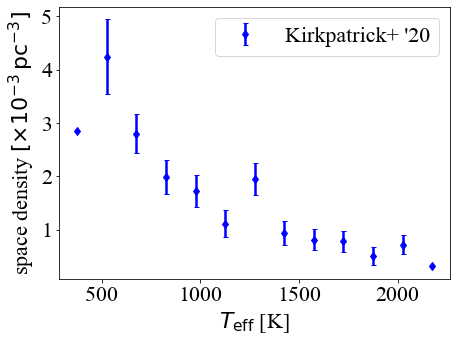

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.errorbar(bins, rho, error_rho, fmt="d", elinewidth=2.5, capsize=2.5, label="Kirkpatrick+ '20", color="blue")

ax.legend()
ax.set_ylabel(r"space density $\rm [\times 10^{-3}\,pc^{-3}]$")
ax.set_xlabel(r"$T_{\rm eff}$ [K]")

### Spatial distribution

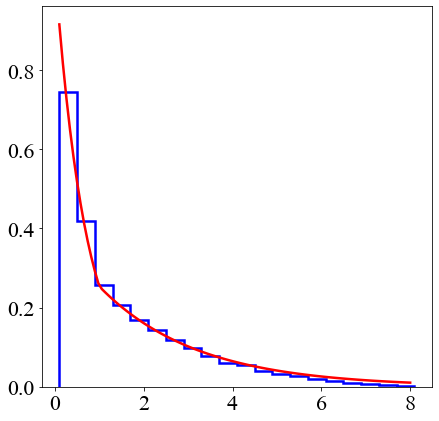

In [31]:
# Checking sampling results

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

radius = np.linspace(0.1, 8., 100)
from scipy.integrate import quad
A = quad(rho, 0.1, 8.178, args=(0., np.pi/2., ))
ax.plot(radius, rho(radius, 0., np.pi/2.)/A[0], color="red", lw=2.5)

_, _, _ = ax.hist(r, histtype="step", linewidth=2.5, color="blue", density=True, bins=20)


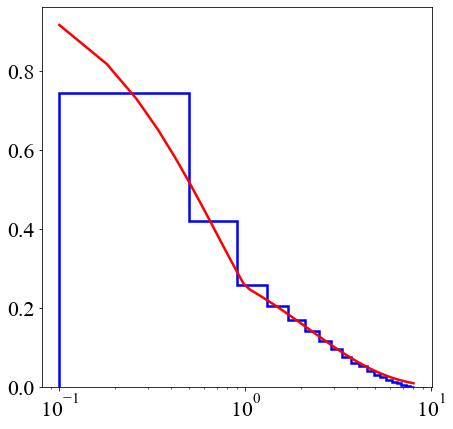

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

radius = np.linspace(0.1, 8., 100)
from scipy.integrate import quad
A = quad(rho, 0.1, 8.178, args=(0., np.pi/2., ))
ax.plot(radius, rho(radius, 0., np.pi/2.)/A[0], color="red", lw=2.5)

_, _, _ = ax.hist(r, histtype="step", linewidth=2.5, color="blue", density=True, bins=20)

ax.set_xscale("log")

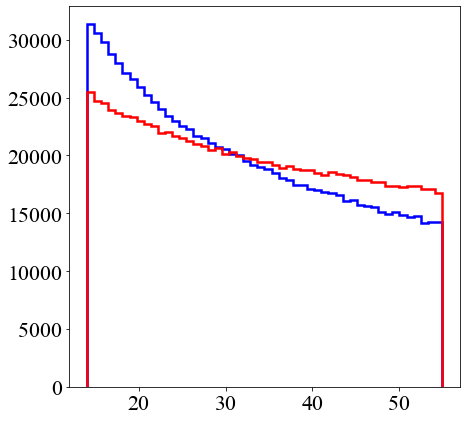

In [14]:
from utils import random_powerlaw

N = 1000000
mass1 = random_powerlaw(-0.6, N, Mmin=14, Mmax=55)
mass2 = random_powerlaw(-0.3, N, Mmin=14, Mmax=55)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
_, _, _ = ax.hist(mass1, color="blue", histtype="step", bins=50, linewidth=2.5)
_, _, _ = ax.hist(mass2, histtype="step", color="red", bins=50, linewidth=2.5)

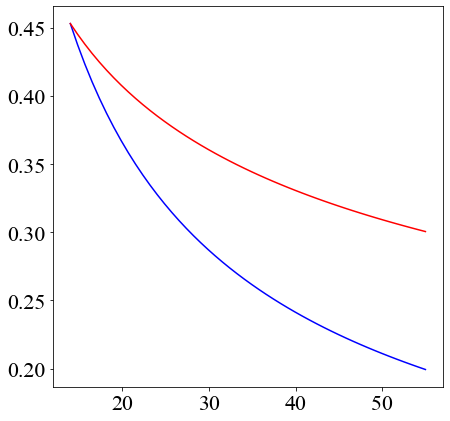

In [11]:
def IMF(M, alpha):
    return np.power(M, -alpha)

M = np.linspace(14, 55)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(M, IMF(14, 0.3)/IMF(14, 0.6)*IMF(M, 0.6), color="blue")
ax.plot(M, IMF(M, 0.3), color="red")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(M, IMF(14, 0.3)/IMF(14, 0.6)*IMF(M, 0.6), color="blue")
ax.plot(M, IMF(M, 0.3), color="red")

## Noise in mass estimate

In [15]:
import sys
sys.path.append("../python/")
import imp

import mock_generation
imp.reload(mock_generation)
from mock_generation import mock_population
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mock_population?

In [11]:
_, _, mass1, mass_wn1, _ = mock_population(1000, 0.1, 0.1, 1., 1., 5.)
_, _, mass2, mass_wn2, _ = mock_population(1000, 0.1, 0.2, 1., 1., 5.)

In [14]:
print(np.sum(np.abs(mass_wn1 - mass1)/mass1)/1000*100)
print(np.sum(np.abs(mass_wn2 - mass2)/mass2)/1000*100)

7.872992834442383
15.97226555827462


Text(0.5, 0, '$\\sigma_M$')

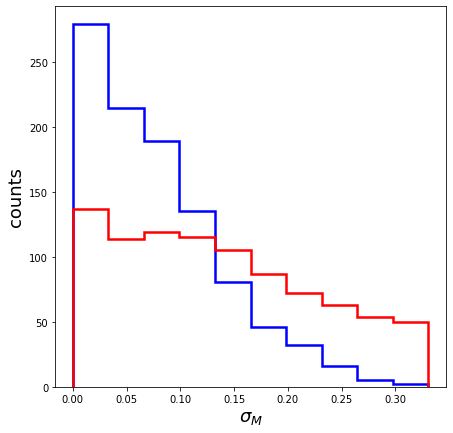

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

counts1, bins, _ = ax.hist(np.abs(mass_wn1 - mass1)/mass1, histtype="step", color="b", lw=2.5)
counts2, _, _    = ax.hist(np.abs(mass_wn2 - mass2)/mass2, histtype="step", color="r", lw=2.5, bins=bins)

ax.set_ylabel("counts", fontsize=18)
ax.set_xlabel(r"$\sigma_M$", fontsize=18)

Text(0.5, 0, '$\\sigma_M$')

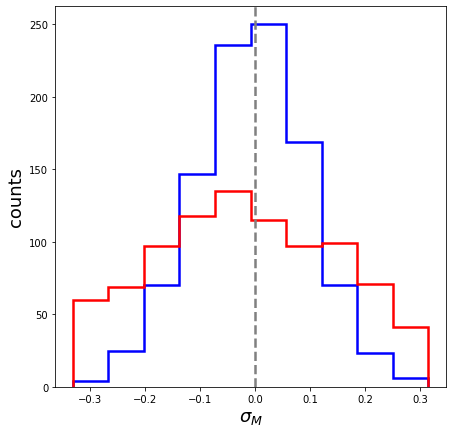

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

counts1, bins, _ = ax.hist((mass_wn1 - mass1)/mass1, histtype="step", color="b", lw=2.5)
counts2, _, _    = ax.hist((mass_wn2 - mass2)/mass2, histtype="step", color="r", lw=2.5, bins=bins)
ax.axvline(0., ls="--", color="grey", lw=2.5)
ax.set_ylabel("counts", fontsize=18)
ax.set_xlabel(r"$\sigma_M$", fontsize=18)

Text(0.5, 0, '$\\sigma_M$')

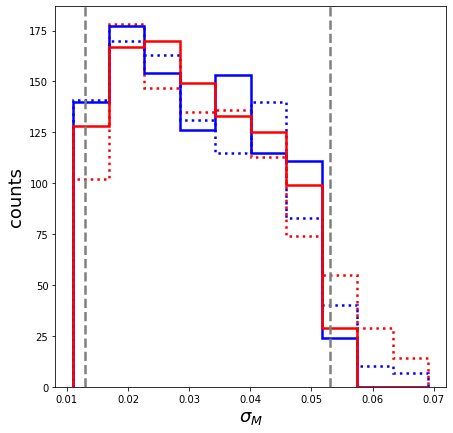

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

_, bins, _ = ax.hist(mass1, histtype="step", color="b", ls=":", lw=2.5)
_, _, _    = ax.hist(mass2, histtype="step", color="r", ls=":", lw=2.5, bins=bins)
counts1, _, _ = ax.hist(mass_wn1, histtype="step", color="b", lw=2.5, bins=bins)
counts2, _, _    = ax.hist(mass_wn2, histtype="step", color="r", lw=2.5, bins=bins)
ax.axvline(0.013, ls="--", color="grey", lw=2.5)
ax.axvline(0.053, ls="--", color="grey", lw=2.5)

ax.set_ylabel("counts", fontsize=18)
ax.set_xlabel(r"$\sigma_M$", fontsize=18)

## DM velocity dispersion

In [2]:
from scipy.special import hyp2f1
from scipy.interpolate import interp1d

def vgNFW(Rsun, R, parameters):
    """
    Rotation velocity for gNFW dark matter density profile
    """
    # gNFW parameters
    gamma = parameters[0]
    Rs    = parameters[1]
    rho0  = parameters[2]
    v     = [];
    for Rint in R:
        hyp=np.float(hyp2f1(3-gamma,3-gamma,4-gamma,-Rint/Rs))
        Integral=(-2**(2+3*gamma)*np.pi*Rint**(3-gamma)*(1+
                  Rsun*(1./Rs))**(3-gamma)*rho0*hyp)/(-3+gamma)
        v.append(np.sqrt(1.18997*10.**(-31.)*Integral/Rint)*3.08567758*10.**(16.))
    v = np.array(v,dtype=np.float64)
    # Return
    return v

def vc(Rsun, Rint, parameters, filepath):
    data = np.genfromtxt(filepath + "rc_e2bulge_R08.178_J_corr.dat", unpack=True)
    r = data[0]
    vB = data[1]
    data = np.genfromtxt(filepath + "rc_hgdisc_R08.178_corr.dat", unpack=True)
    vD = data[1]
    vDM = vgNFW(Rsun, r, parameters)
    vtot = np.sqrt(np.power(vB, 2) + np.power(vD, 2)+ np.power(vDM, 2))
    vtot_intp = interp1d(r, vtot)
    return vtot_intp(Rint)

In [16]:
#!head "/home/mariacst/cepheids/data/vbin_R08.1_v0232.704_galkin.dat"
data = np.genfromtxt("/home/mariacst/cepheids/data/vbin_R08.1_v0232.704_galkin.dat", unpack=True)

robs        = 8.1*data[0]
vobs        = data[1]
delta_v_obs = data[2]

In [17]:
R0 = 8.178
r  = np.linspace(0.1, R0, 500)
filepath = "/home/mariacst/exoplanets/exoplanets/data/"

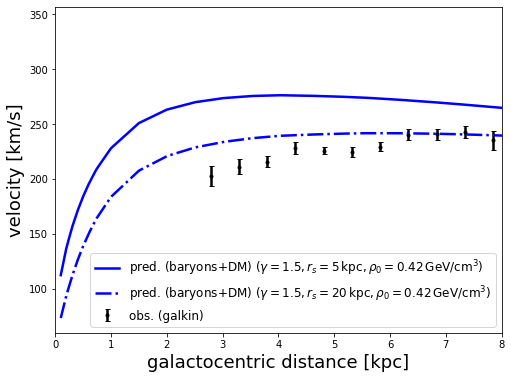

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.errorbar(robs, vobs, yerr=delta_v_obs, fmt=".", elinewidth=2.5, capsize=2.5, color="k", label="obs. (galkin)")

parameters = [1.5, 5., 0.42]
rc = vc(R0, r, parameters, filepath)
ax.plot(r, rc, ls="-", lw=2.5, color="blue", label=r"pred. (baryons+DM) $(\gamma=1.5, r_s=5\,{\rm kpc}, \rho_0=0.42\,{\rm GeV/cm^3})$")

parameters = [1.5, 20., 0.42]
rc = vc(R0, r, parameters, filepath)
ax.plot(r, rc, ls="-.", lw=2.5, color="blue", label=r"pred. (baryons+DM) $(\gamma=1.5, r_s=20\,{\rm kpc}, \rho_0=0.42\,{\rm GeV/cm^3})$")

#data = np.genfromtxt(filepath + "rc_e2bulge_R08.178_J_corr.dat", unpack=True)
#rb = data[0]; vb = data[1]
#ax.plot(data[0], data[1], ls="--", color="red", label="bulge", lw=2.5)
#data = np.genfromtxt(filepath + "rc_hgdisc_R08.178_corr.dat", unpack=True)
#rd = data[0]; vd = data[1]
#ax.plot(data[0], data[1], ls=":", color="red", label="disc", lw=2.5)
#ax.plot(r, vgNFW(R0, r, parameters), ls="-.", color="red", label=r"DM $(\gamma=1, r_s=20\,{\rm kpc})$", lw=2.5)

ax.legend(loc=4, ncol=1, fontsize=12)
ax.set_ylabel("velocity [km/s]", fontsize=18)
ax.set_xlabel("galactocentric distance [kpc]", fontsize=18)
ax.set_xlim(0, 8)
fig.savefig("../../Figs/rc_DMshape.pdf", bbox_inches="tight")

1.071302605210421 25.596445971806023
0.1 0.1 24.60115486403112
175.29815935912328 95.75660607397832


Text(0.5, 0, 'galactocentric distance [kpc]')

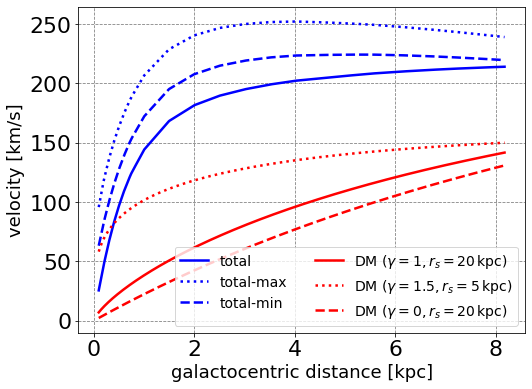

In [12]:
print(r[60], rc[0])
print(rb[4], rd[4], np.sqrt(np.power(vb[4], 2) + np.power(vd[4], 2)))

rc2 = vc(R0, r, [0.5, 20., 0.42], filepath)
rc3 = vc(R0, r, [1.5, 5., 0.42], filepath)

print(rc2[60], rc3[0])

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(r, rc, ls="-", lw=2.5, color="blue", label="total")
ax.plot(r, rc3, ls=":", lw=2.5, color="blue", label="total-max")
ax.plot(r, rc2, ls="--", lw=2.5, color="blue", label="total-min")

ax.plot(r, vgNFW(R0, r, parameters), ls="-", color="red", label=r"DM $(\gamma=1, r_s=20\,{\rm kpc})$", lw=2.5)
ax.plot(r, vgNFW(R0, r, [1.5, 5., 0.42]), ls=":", color="red", label=r"DM $(\gamma=1.5, r_s=5\,{\rm kpc})$", lw=2.5)
ax.plot(r, vgNFW(R0, r, [0., 20., 0.42]), ls="--", color="red", label=r"DM $(\gamma=0, r_s=20\,{\rm kpc})$", lw=2.5)

ax.grid(which="both", ls="--", color="grey")

ax.legend(loc=4, ncol=2, fontsize=14)
ax.set_ylabel("velocity [km/s]", fontsize=18)
ax.set_xlabel("galactocentric distance [kpc]", fontsize=18)
fig.savefig("../../Figs/rc_variation.pdf", bbox_inches="tight")

No handles with labels found to put in legend.


(0.0, 1.0)

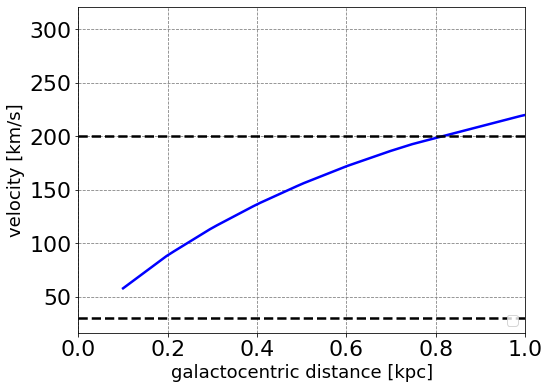

In [17]:
rc = vc(R0, r, [1., 5., 0.42], filepath)


fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(r, np.sqrt(3/2)*rc, ls="-", lw=2.5, color="blue")
ax.axhline(200., color="k", ls="--", lw=2.5)
ax.axhline(30., color="k", ls="--", lw=2.5)
ax.grid(which="both", ls="--", color="grey")

ax.legend(loc=4, ncol=2, fontsize=14)
ax.set_ylabel("velocity [km/s]", fontsize=18)
ax.set_xlabel("galactocentric distance [kpc]", fontsize=18)
ax.set_xlim(0., 1.)

## GC sampling - test 

In [3]:
def rho_bulge(r, phi, theta, R0=8.178, x0=0.899, y0=0.386, z0=0.250, 
              alpha=0.415):
    """
    Density profile for Stanek + '97 (E2) bulge [arbitrary units]
    (all spatial coordiantes are given in kpc)
    """
    x0 = x0*R0/8. # rescale to adopted R0 value
    y0 = y0*R0/8. 
    # return
    return (np.exp(-np.sqrt(np.sin(theta)**2*((np.cos(phi+alpha)/x0)**2 +
                            (np.sin(phi+alpha)/y0)**2) + 
                            (np.cos(theta)/z0)**2)*r))

def rho_disc(r, theta, R0=8.178, Rd=2.15, zh=0.40):
    """
    Density profile for Bovy and Rix disc [arbitrary units]
    (all spatial coordiantes are given in kpc)
    """
    Rd = Rd*R0/8. # rescale to adopted R0 value
    # return
    return np.exp(-r*np.sin(theta)/Rd)*np.exp(-r*np.cos(theta)/zh)


def rho(r, phi, theta, R0=8.178):
    """
    Density profile [arbitrary units]
    """
    # continuity condition at r = 1 kpc
    C    = rho_disc(1., theta, R0)/rho_bulge(1., phi, theta, R0)
    _rho = C*rho_bulge(r, phi, theta, R0)
    # return
    return (np.heaviside(1.-r, 1.)*_rho +
            np.heaviside(r-1., 0.)*rho_disc(r, theta, R0))

def spatial_sampling(nBDs, phi=0., theta=np.pi/2., R0=8.178):
    """
    Sampling nBDs points from density profile rho using Von Neumann 
    acceptance-rejection technique
    """
    ymin = 0.1; ymax = 1.0
    umin = np.min([rho(ymin, phi, theta), rho(1., phi, theta),
                   rho(R0, phi, theta)])
    umax = np.max([rho(ymin, phi, theta), rho(1., phi, theta),
                   rho(R0, phi, theta)])

    i = 0
    r = np.ones(nBDs)*100
    while i<nBDs:
        yi = np.random.uniform(ymin, ymax)
        ui = np.random.uniform(umin, umax)
        if ui < rho(yi, phi, theta, R0):
            r[i] = yi
            i+=1
        else:
            continue
    # return 
    return r

In [9]:
r0 = spatial_sampling(1000)
r = spatial_sampling(1000, phi=0., theta=0.)
r1 = spatial_sampling(1000, phi=np.pi/2., theta=0.)

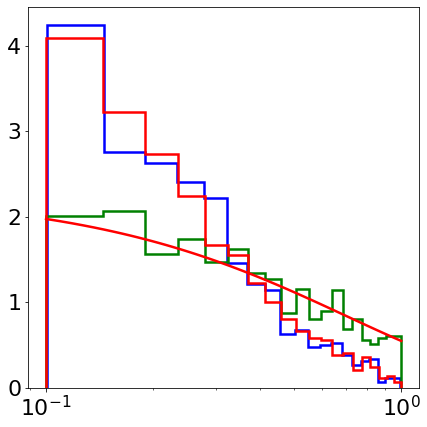

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

radius = np.linspace(0.1, 1., 100)
from scipy.integrate import quad
A = quad(rho, 0.1, 1., args=(0., np.pi/2., ))
ax.plot(radius, rho(radius, 0., np.pi/2.)/A[0], color="red", lw=2.5)
#r = spatial_sampling(1000)
_, _, _ = ax.hist(r, histtype="step", linewidth=2.5, color="blue", density=True, bins=20)
_, _, _ = ax.hist(r0, histtype="step", linewidth=2.5, color="g", density=True, bins=20)
_, _, _ = ax.hist(r1, histtype="step", linewidth=2.5, color="red", density=True, bins=20)

ax.set_xscale("log")

# Update ATMO input files

In [ ]:
import glob

# load theoretical BD cooling model - ATMO 2020
path =  "/home/mariacst/cluster/data/"
#path = "/Users/mariabenito/Dropbox/exoplanets/DM/python/cluster/data/"
#path  = path 
M     = []
age   = {}
Teff  = {}
files = glob.glob(path + "*.txt")
for file in files:
    data = np.genfromtxt(file, unpack=True)
    age[data[0][0]]  = data[1] # age [Gyr]
    Teff[data[0][0]] = data[2] # Teff [K]
    M.append(data[0][0])

_age   = np.linspace(1, 10, 100)
_age_i = []; _mass = []; _teff = []
# the first 5 masses do not have all values between 1 and 10 Gyr
M = np.sort(M)[5:] # further remove larger masses
for m in M:
    Teff_interp = interp1d(age[m], Teff[m])
    for _a in _age:
        _age_i.append(_a)
        _mass.append(m)
        _teff.append(Teff_interp(_a))
points = np.transpose(np.asarray([_age_i, _mass]))
values = np.asarray(_teff)

print(points.shape)

_age_i = np.asarray(_age_i)
_mass  = np.asarray(_mass)
_teff  = np.asarray(_teff)

with open("ATMO_CEQ_vega_MIRI.txt", "w") as f:
    #f.write("#age[Gyr]  mass[]  T[K]")
    for a, m, T in zip(_age_i, _mass, _teff):
        f.write('%.6f %.6f %.6f\n' %(a, m, T))

# Limiting minimum temperature/dust obscuration

In [2]:
from mock_generation import mock_population, mock_population_sens

In [3]:
relT=0.1; relM=0.1; f=1.; g=0.; rs=20.
r1, T1, m1, a1 = mock_population(1000, relT, relM, f, g, rs)
r2, T2, m2, a2 = mock_population(10000, relT, relM, f, g, rs)
r3, T3, m3, a3 = mock_population(100000, relT, relM, f, g, rs)

In [4]:
pos1 = np.where(T1<650.)
pos2 = np.where(T2<650.)
pos3 = np.where(T3<650.)

print(len(pos1[0]), len(pos1[0])/len(T1))
print(len(pos2[0]), len(pos2[0])/len(T2))
print(len(pos3[0]), len(pos3[0])/len(T3))

554 0.554
5809 0.5809
57124 0.57124


In [57]:
pos1 = np.where(T1<650.)
pos2 = np.where(T2<650.)
pos3 = np.where(T3<650.)

print(len(pos1[0]), len(pos1[0])/len(T1))
print(len(pos2[0]), len(pos2[0])/len(T2))
print(len(pos3[0]), len(pos3[0])/len(T3))

553 0.553
5611 0.5611
57317 0.57317


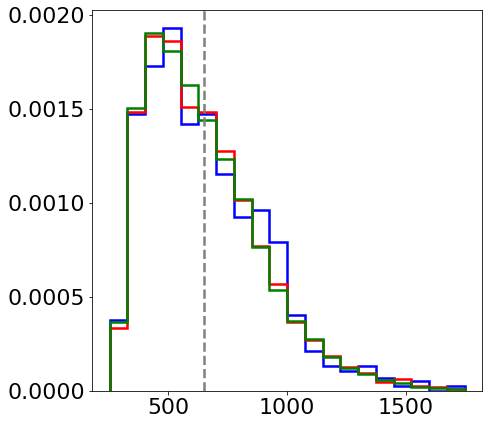

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.axvline(650, color="grey", lw=2.5, ls="--")
_, bins, _ = ax.hist(T1, bins=20, histtype="step", color="blue", lw=2.5, density=True)
_, _, _ = ax.hist(T2, bins=bins, histtype="step", color="red", lw=2.5, density=True)
_, _, _ = ax.hist(T3, bins=bins, histtype="step", color="green", lw=2.5, density=True)

In [59]:
relT=0.1; relM=0.1; f=1.; g=1.5; rs=5.

r1, T1, m1, a1 = mock_population(1000, relT, relM, f, g, rs)
r2, T2, m2, a2 = mock_population(10000, relT, relM, f, g, rs)
r3, T3, m3, a3 = mock_population(100000, relT, relM, f, g, rs)

In [60]:
pos1 = np.where(T1<650.)
pos2 = np.where(T2<650.)
pos3 = np.where(T3<650.)

print(len(pos1[0]), len(pos1[0])/len(T1))
print(len(pos2[0]), len(pos2[0])/len(T2))
print(len(pos3[0]), len(pos3[0])/len(T3))

335 0.335
3431 0.3431
33969 0.33969


In [128]:
from mock_generation import mock_population

relT=0.1; relM=0.1; f=1.; g=0.; rs=20.
r1, T1, m1, a1 = mock_population(int(4.5*1000), relT, relM, f, g, rs)
r2, T2, m2, a2 = mock_population(int(4.5*10000), relT, relM, f, g, rs)
r3, T3, m3, a3 = mock_population(int(4.5*100000), relT, relM, f, g, rs)

In [88]:
Tmin = 650.
pos  = np.where((m1 > 0.013) & (m1 < 0.053) & (T1 > Tmin))
r1 = r1[pos]
T1 = T1[pos]
m1 = m1[pos]
a1 = a1[pos]
T1.shape

(1188,)

In [89]:
Tmin = 650.
pos  = np.where((m2 > 0.013) & (m2 < 0.053) & (T2 > Tmin))
r2 = r2[pos]
T2 = T2[pos]
m2 = m2[pos]
a2 = a2[pos]
T2.shape

(11486,)

In [90]:
Tmin = 650.
pos  = np.where((m3 > 0.013) & (m3 < 0.053) & (T3 > Tmin))
r3 = r3[pos]
T3 = T3[pos]
m3 = m3[pos]
a3 = a3[pos]
T3.shape

(116039,)

In [93]:
len(pos[0])

116039

In [94]:
from mock_generation import mock_population

In [101]:
relT=0.1; relM=0.1; f=1.; g=0.; rs=20.
r1, T1, m1, a1 = mock_population(1000, relT, relM, f, g, rs, 0.42, 650.)
r2, T2, m2, a2 = mock_population(10000, relT, relM, f, g, rs, 650.)
r3, T3, m3, a3 = mock_population(100000, relT, relM, f, g, rs, 650.)
print(r1.shape, r2.shape, r3.shape)

holi
holi
holi
(1000,) (10000,) (100000,)


In [124]:
imp.reload(mock_generation)
from mock_generation import mock_population_sens
path =  "./data/"
data = np.genfromtxt(path + "./ATMO_CEQ_vega_MIRI.txt", unpack=True)
points = np.transpose(data[0:2, :])
values = data[2]
#print(points, values)

In [125]:
Tobs, Teff = mock_population_sens(1000, relT, relM, points, values, f, g, rs, 0.42, 650.)

(array([ 16., 236., 252., 187., 111.,  93.,  38.,  25.,  13.,  14.]),
 array([ 560.16091988,  657.43990193,  754.71888398,  851.99786603,
         949.27684808, 1046.55583014, 1143.83481219, 1241.11379424,
        1338.39277629, 1435.67175834, 1532.95074039]),
 [<matplotlib.patches.Polygon at 0x7fdfb65fd438>])

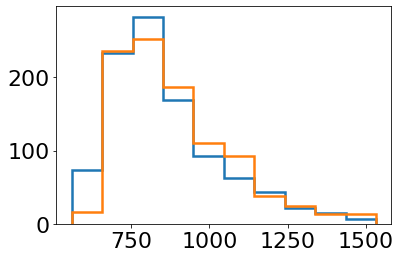

In [126]:
fig, ax = plt.subplots()
_, bins, _ = ax.hist(Teff, histtype="step", lw=2.5)
ax.hist(Tobs, bins=bins, histtype="step", lw=2.5)

In [1]:
import sys
sys.path.append("../../../Tmin/")
#sys.path.append("../python/cluster")

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh.palettes
import imp
from matplotlib.offsetbox import AnchoredText
import mock_generation
imp.reload(mock_generation)
from mock_generation import mock_population
from astropy.constants import R_jup, M_jup, M_sun, L_sun
from scipy.interpolate import interp1d, interp2d
from utils import temperature, heat, temperature_withDM

from matplotlib import rc
rc('font', family='times new roman', size=22.)

In [2]:
mock_population?

In [ ]:
for i in range(40):
    robs, Tobs, mass, age = mock_population(100000, 0.1, 0.2, 1., 0., 5., 0.42, 650.)

Tmin =  650.0 110762
Tmin =  650.0 110579
Tmin =  650.0 110274
Tmin =  650.0 110329
Tmin =  650.0 111202
Tmin =  650.0 110335
Tmin =  650.0 111019
Tmin =  650.0 110539
Tmin =  650.0 110865
Tmin =  650.0 110702
Tmin =  650.0 110888
Tmin =  650.0 110902
Tmin =  650.0 110681
Tmin =  650.0 110123
Tmin =  650.0 110625
Tmin =  650.0 110275
Tmin =  650.0 110597
Tmin =  650.0 110923
Tmin =  650.0 110606
Tmin =  650.0 110717


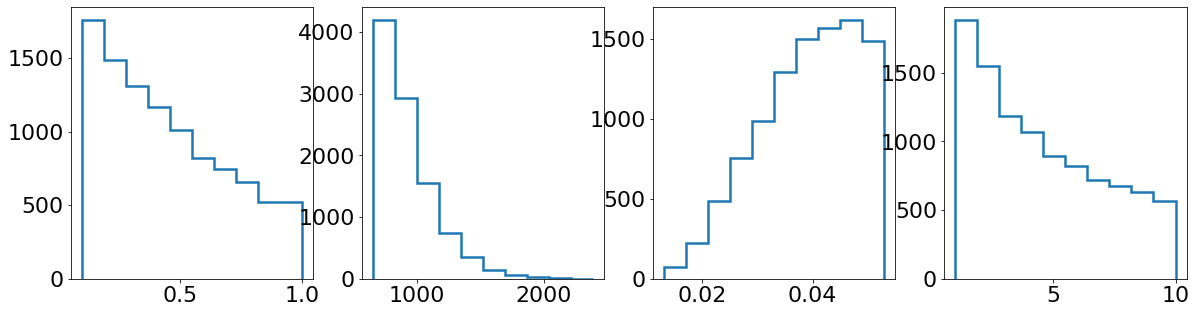

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

_, _, _ = ax[0].hist(robs, histtype="step", lw=2.5)
_, _, _ = ax[1].hist(Tobs, histtype="step", lw=2.5)
_, _, _ = ax[2].hist(mass, histtype="step", lw=2.5)
_, _, _ = ax[3].hist(age, histtype="step", lw=2.5)

# Check mock population with uncertainties in all variables

In [3]:
mock_population_all?

In [45]:
N=100
relT=0.10; relM=0.10; relRobs=0.20; relA=0.20
f = 1.; gamma = 1.; rs=20.

In [46]:
robs_wn, Tobs, mass, ages_wn, robs, ages = mock_population_all(N, relT, relM, relRobs, relA, f, gamma, rs)

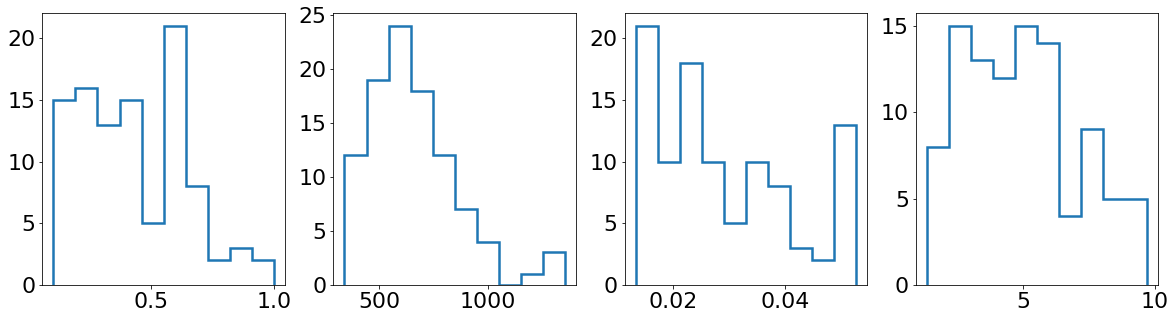

In [47]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

_, _, _ = ax[0].hist(robs_wn, histtype="step", lw=2.5)
_, _, _ = ax[1].hist(Tobs, histtype="step", lw=2.5)
_, _, _ = ax[2].hist(mass, histtype="step", lw=2.5)
_, _, _ = ax[3].hist(ages_wn, histtype="step", lw=2.5)

-0.024166101424088787 20.721559773563428


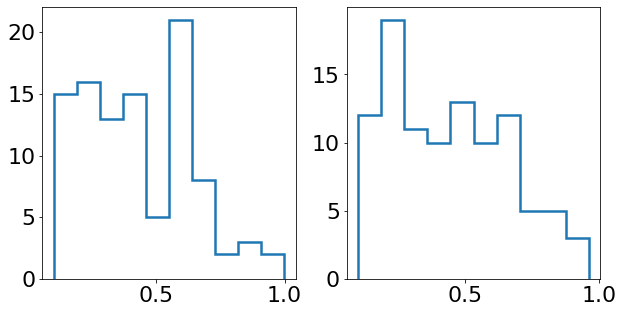

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

_, _, _ = ax[0].hist(robs_wn, histtype="step", lw=2.5)
_, _, _ = ax[1].hist(robs, histtype="step", lw=2.5)
print(np.mean((robs_wn-robs)/robs), np.std((robs_wn-robs)/robs)*100)

0.015079895718686334 18.67047080081808


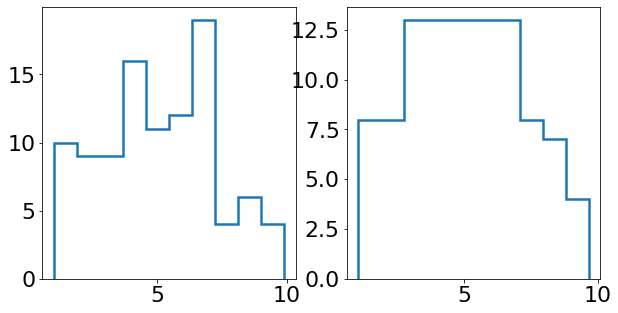

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

_, _, _ = ax[0].hist(ages_wn, histtype="step", lw=2.5)
_, _, _ = ax[1].hist(ages, histtype="step", lw=2.5)
print(np.mean((ages_wn-ages)/ages), np.std((ages_wn-ages)/ages)*100)

## Checking DM heating effect

In [31]:
import imp
import mock_generation
imp.reload(mock_generation)
from mock_generation import mock_population_all

In [32]:
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('font', family='serif',size=25)

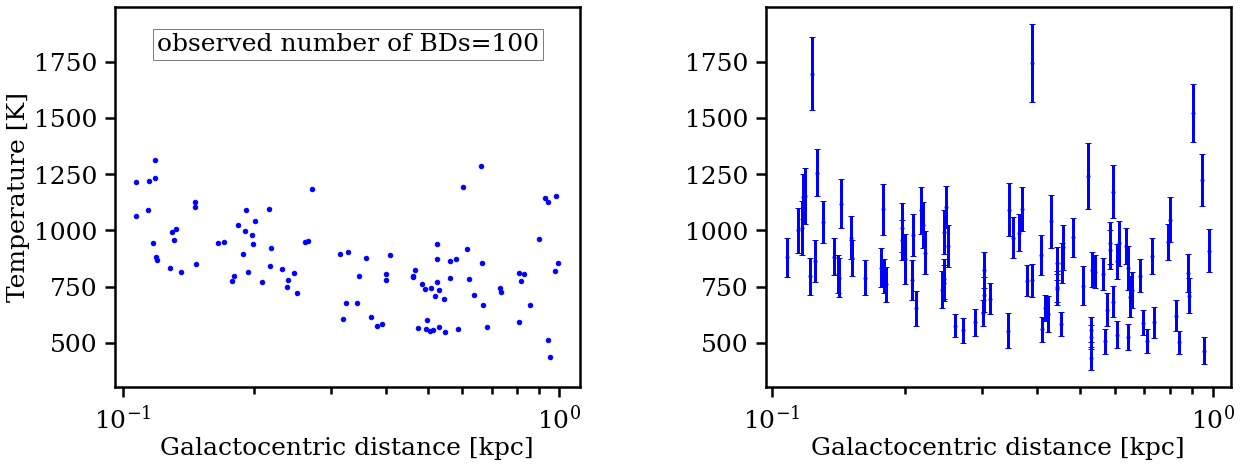

In [72]:
nBDs = 100

f_true=1.; gamma_true=1.5; rs_true=20.; rho0_true=0.42

relT = 0.; sigma=0.

fig, ax = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
fig.subplots_adjust(wspace=0.08, hspace=0.08)


ax[0].tick_params(which='major',direction="out",width=2.5,length=10,right=False,top=False,pad=7)
ax[0].tick_params(which='minor',direction="out",width=2.5,length=7,right=True,top=False,pad=7)

np.random.seed(100)
(robs, sigmarobs, Tobs, sigmaTobs, Mobs,                                      
 sigmaMobs, Aobs, sigmaAobs) = mock_population_all(nBDs, relT, sigma,    
                                  sigma, sigma, f_true, gamma_true,          
                                  rs_true, rho0_true=0.42, v=50., Tmin=0.)
ax[0].scatter(robs, Tobs, marker=".", color="blue", s=80)  
ax[0].text(0.12, 1800, "observed number of BDs=%i" %nBDs, bbox=dict(facecolor='white', alpha=0.5))
#ax.set_ylim(-400, 3000); ax.set_xlim(0.1, 1.)

relT = 0.1; sigma=0.2
ax[1].tick_params(which='major',direction="out",width=2.5,length=10,right=False, left=True,top=False,pad=7)
ax[1].tick_params(which='minor',direction="out",width=2.5,length=7,right=False,top=False,pad=7)

np.random.seed(100)
(robs, sigmarobs, Tobs, sigmaTobs, Mobs,                                      
 sigmaMobs, Aobs, sigmaAobs) = mock_population_all(nBDs, relT, sigma,    
                                  sigma, sigma, f_true, gamma_true,          
                                  rs_true, rho0_true=0.42, v=50., Tmin=0.)
ax[1].errorbar(robs, Tobs, yerr=sigmaTobs, fmt=".", color="blue", capsize=3., linewidth=3.) 
    
ax[0].set_xscale("log"); ax[1].set_xscale("log")
ax[0].set_ylabel("Temperature [K]")
ax[0].set_xlabel("Galactocentric distance [kpc]"); ax[1].set_xlabel("Galactocentric distance [kpc]")

#ax[1].yaxis.set_label_position("left")
#ax[1].yaxis.tick_right()
ax[1].yaxis.set_tick_params(labelleft='on')

plt.subplots_adjust(wspace=0.4)
fig.savefig("TvsR_uncertainty_2.pdf", bbox_inches="tight")

ValueError: too many values to unpack (expected 5)

findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.


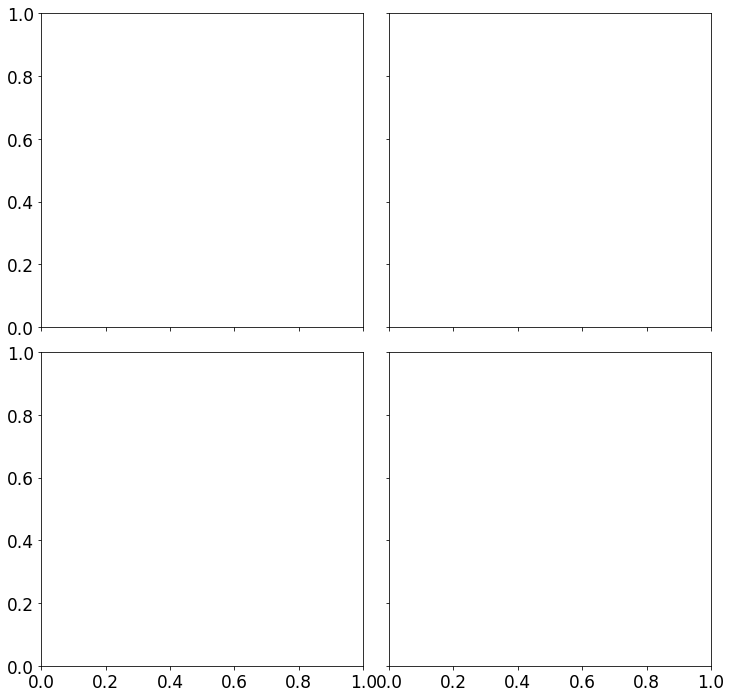

In [5]:
nBDs = [10, 100, 1000, 10000]

f_true=1.; gamma_true=1.5; rs_true=20.; rho0_true=0.42

relT = 0.
relM = 0.; relA=0.; relR=0.

fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

for n, ax in zip(nBDs, axes.ravel()):
    robs, Tobs, sigmaTobs, mass, ages = mock_population_all(n, relT, relM, relR, relA, f_true, gamma_true, 
                                                            rs_true, rho0_true=rho0_true)
    ax.scatter(robs, Tobs, marker=".", color="blue")  
    ax.text(0.7, 1050, "nBDs=%i" %n)
    #ax.set_ylim(-400, 3000); ax.set_xlim(0.1, 1.)
    
axes[0, 0].set_ylabel("Temperature [K]"); axes[1, 0].set_ylabel("Temperature [K]")
axes[1, 0].set_xlabel("R [kpc]"); axes[1, 1].set_xlabel("R [kpc]")
#fig.savefig("TvsR_relT0.0_relX0.0.pdf", bbox_inches="tight")

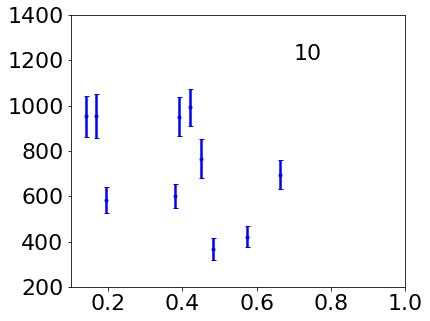

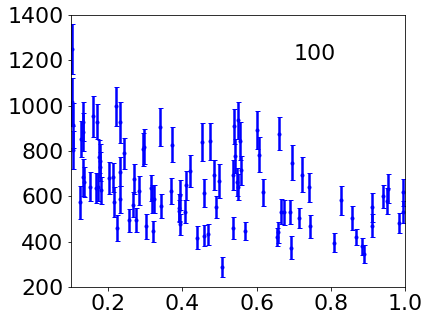

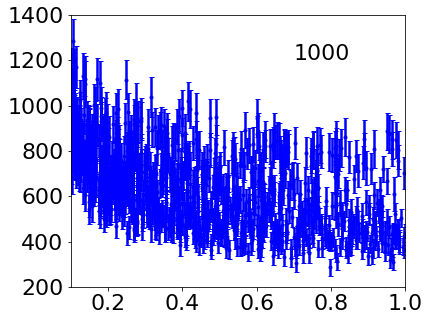

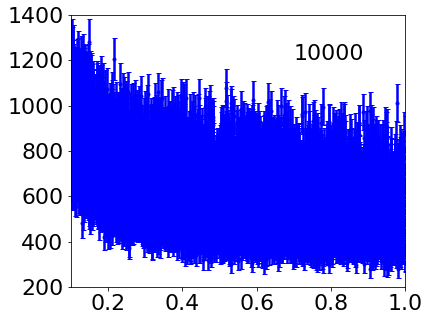

In [24]:
nBDs = [10, 100, 1000, 10000]

f_true=1.; gamma_true=1.5; rs_true=20.; rho0_true=0.42

relT = 0.1
relM = 0.; relA=0.; relR=0.


for n in nBDs:
    robs, Tobs, sigmaTobs, mass, ages = mock_population_all(n, relT, relM, relR, relA, f_true, gamma_true, 
                                                            rs_true, rho0_true=rho0_true)

    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    ax.errorbar(robs, Tobs, yerr=sigmaTobs, fmt=".", capsize=2.5, elinewidth=2.5, color="blue")
    
    ax.text(0.7, 1200, n)
    ax.set_ylim(200, 1400); ax.set_xlim(0.1, 1.)

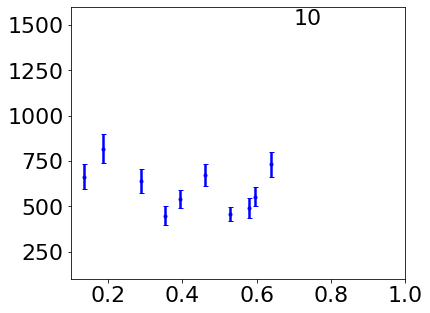

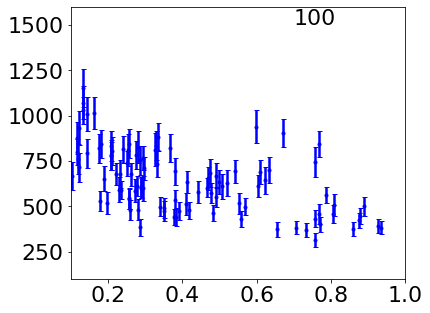

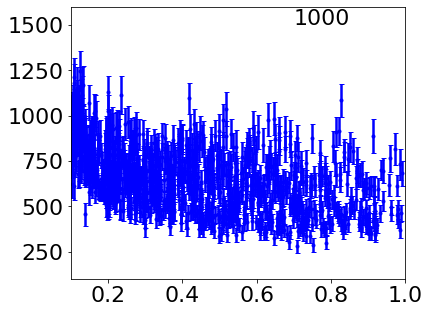

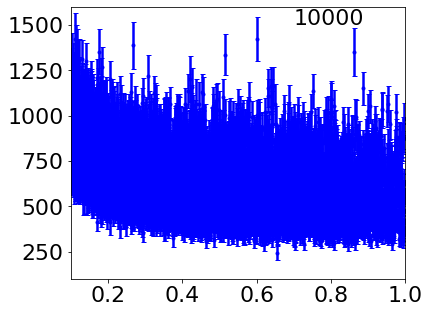

In [26]:
nBDs = [10, 100, 1000, 10000]

f_true=1.; gamma_true=1.5; rs_true=20.; rho0_true=0.42

relT = 0.1
relM = 0.1; relA=0.1; relR=0.1


for n in nBDs:
    robs, Tobs, sigmaTobs, mass, ages = mock_population_all(n, relT, relM, relR, relA, f_true, gamma_true, 
                                                            rs_true, rho0_true=rho0_true)

    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    ax.errorbar(robs, Tobs, yerr=sigmaTobs, fmt=".", capsize=2.5, elinewidth=2.5, color="blue")
    
    ax.text(0.7, 1500, n)
    ax.set_ylim(100, 1600); ax.set_xlim(0.1, 1.)

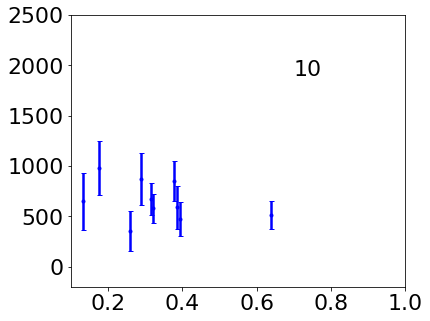

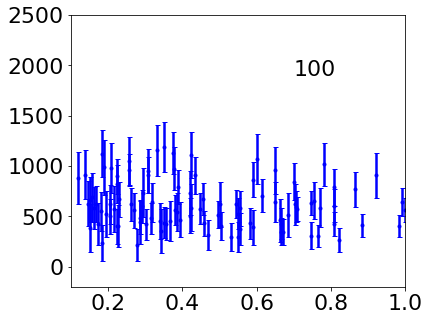

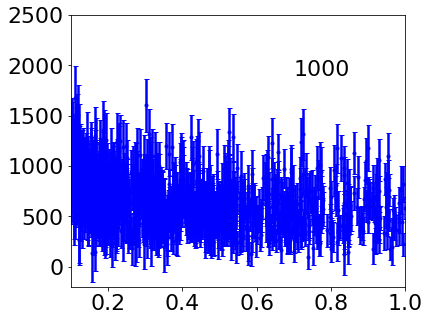

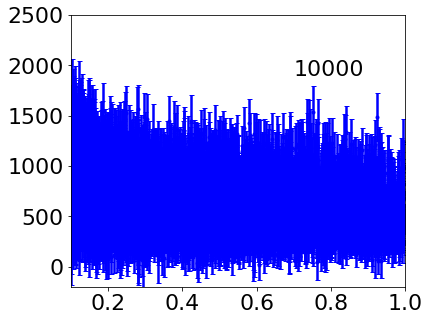

In [31]:
nBDs = [10, 100, 1000, 10000]

f_true=1.; gamma_true=1.5; rs_true=20.; rho0_true=0.42

relT = 0.3
relM = 0.; relA=0.; relR=0.


for n in nBDs:
    robs, Tobs, sigmaTobs, mass, ages = mock_population_all(n, relT, relM, relR, relA, f_true, gamma_true, 
                                                            rs_true, rho0_true=rho0_true)

    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    ax.errorbar(robs, Tobs, yerr=sigmaTobs, fmt=".", capsize=2.5, elinewidth=2.5, color="blue")
    
    ax.text(0.7, 1900, n)
    ax.set_ylim(-200, 2500); ax.set_xlim(0.1, 1.)

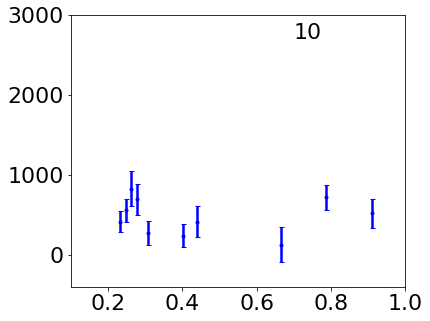

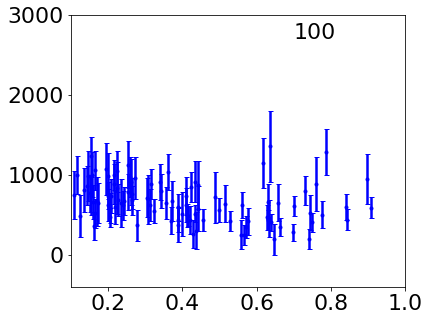

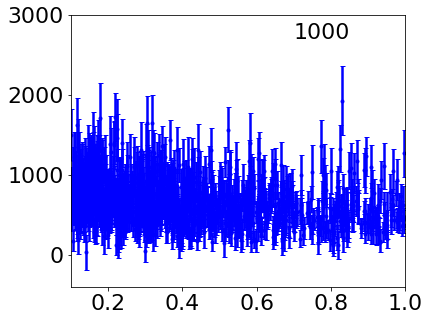

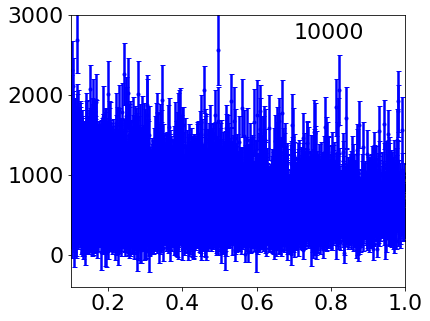

In [34]:
nBDs = [10, 100, 1000, 10000]

f_true=1.; gamma_true=1.5; rs_true=20.; rho0_true=0.42

relT = 0.3
relM = 0.3; relA=0.3; relR=0.3


for n in nBDs:
    robs, Tobs, sigmaTobs, mass, ages = mock_population_all(n, relT, relM, relR, relA, f_true, gamma_true, 
                                                            rs_true, rho0_true=rho0_true)

    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    ax.errorbar(robs, Tobs, yerr=sigmaTobs, fmt=".", capsize=2.5, elinewidth=2.5, color="blue")
    
    ax.text(0.7, 2700, n)
    ax.set_ylim(-400, 3000); ax.set_xlim(0.1, 1.)

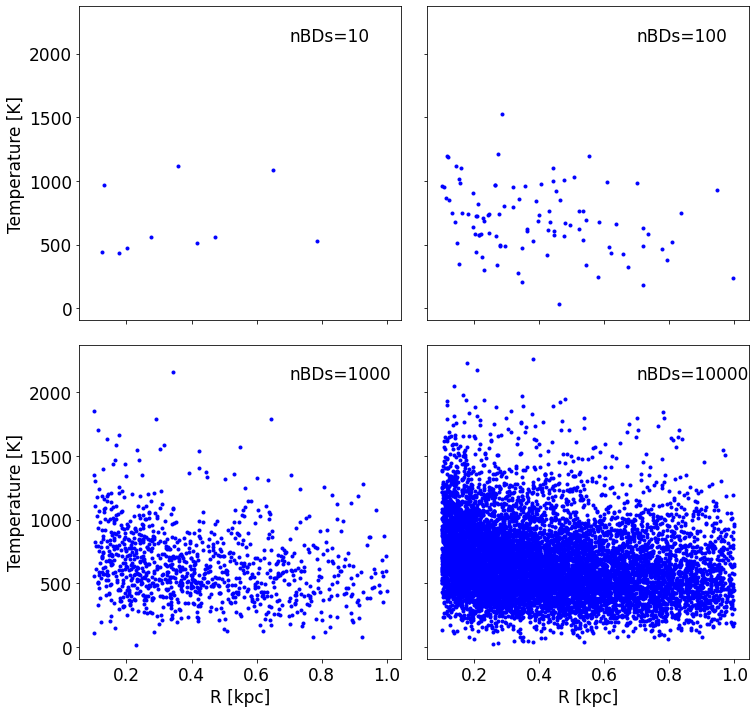

In [57]:
nBDs = [10, 100, 1000, 10000]

f_true=1.; gamma_true=1.5; rs_true=20.; rho0_true=0.42

relT = 0.3
relM = 0.3; relA=0.3; relR=0.3

fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

for n, ax in zip(nBDs, axes.ravel()):
    robs, Tobs, sigmaTobs, mass, ages = mock_population_all(n, relT, relM, relR, relA, f_true, gamma_true, 
                                                            rs_true, rho0_true=rho0_true)
    ax.scatter(robs, Tobs, marker=".", color="blue")  
    ax.text(0.7, 2100, "nBDs=%i" %n)
    #ax.set_ylim(-400, 3000); ax.set_xlim(0.1, 1.)
    
axes[0, 0].set_ylabel("Temperature [K]"); axes[1, 0].set_ylabel("Temperature [K]")
axes[1, 0].set_xlabel("R [kpc]"); axes[1, 1].set_xlabel("R [kpc]")
fig.savefig("TvsR_relT0.30_relX0.3.pdf", bbox_inches="tight")

## Once more

In [52]:
imp.reload(mock_generation)
from mock_generation import mock_population_check

In [66]:
ex         = "check"                                                        
rank       = 0                                                     
nBDs       = 100                                                                                                        
relM       = 0.                                              
relRobs    = 0.                                                  
relA       = 0.                                                   
f_true     = 1.                                                                    
gamma_true = 1.5                                                   
rs_true    = 40.                                                 
v          = 100.  
rho0       = 0.42

In [65]:
# Load theoretical cooling model                                                   
path = "/home/mariacst/exoplanets/running/data/"                                   
data = np.genfromtxt(path + "./ATMO_CEQ_vega_MIRI.txt", unpack=True)               
points = np.transpose(data[0:2, :])                                                
values = data[2]                                                                   
# Mock observation                                                                 
sigmaTobs = 100.                                                                   
np.random.seed(21)                                                                 
(robs, sigmarobs, Tobs, sigmaTobs, Mobs,                                          
     sigmaMobs, Aobs, sigmaAobs) = mock_population_check(nBDs, 0., relM, relRobs, relA, f_true, 
                                                         gamma_true, rs_true, rho0_true=rho0, Tmin=0., v=v)  

In [67]:
# Load theoretical cooling model                                                   
path = "/home/mariacst/exoplanets/running/data/"                                   
data = np.genfromtxt(path + "./ATMO_CEQ_vega_MIRI.txt", unpack=True)               
points = np.transpose(data[0:2, :])                                                
values = data[2]                                                                   
# Mock observation                                                                                                                                    
np.random.seed(21)                                                                 
(robsS, sigmarobsS, TobsS, sigmaTobsS, MobsS,                                          
     sigmaMobsS, AobsS, sigmaAobsS) = mock_population_check(nBDs, 0., relM, relRobs, relA, f_true, 
                                                         gamma_true, 2., rho0_true=rho0, Tmin=0., v=v) 

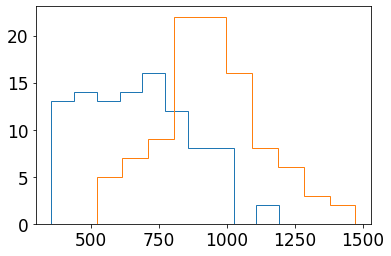

In [70]:
fig, ax = plt.subplots()
ax.hist(Tobs, histtype="step");
ax.hist(TobsS, histtype="step");

(0.0, 2000.0)

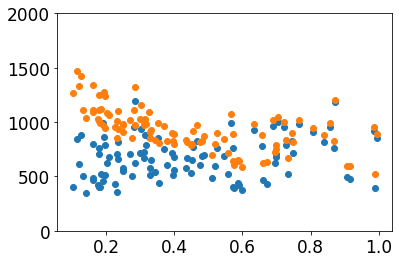

In [72]:
fig, ax = plt.subplots()

ax.scatter(robs, Tobs)
ax.scatter(robsS, TobsS)

ax.set_ylim(0, 2000)

In [74]:
M_sun.value

1.988409870698051e+30

# 10 Gyr old exoplanet

In [117]:
from scipy.interpolate import griddata

def mock_population_all(N, M_in_jup,
                        f_true, gamma_true, rs_true, rho0_true=0.42, 
                        Tmin=0., v=None, _rho="gNFW"):
    """
    Generate N observed exoplanets

    Assumptions
    -----------
    1) N observed exoplanets distributed according to E2 bulge + BR disc
    2) (All) exoplanets radius = Rjup
    3) BD evolution model taken from ATMO 2020
    4) BDs have masses chosen between 14-55 Mjup assuming power-law IMF and
       unifrom age distribution between 1-10 Gyr
    5) Tobs has relative uncertainty rel_unc_Tobs
    6) Estimated masses have an uncertainty of rel_mass
    """
    #np.random.seed(42)
    #print(Tmin)
    # galactocentric radius of simulated exoplanets
    robs = np.linspace(0.01, 10, N)
    # Age
    ages = np.ones(N)*10 # [yr] / [1-10 Gyr]
    # Mass
    mass = np.ones(N)*M_in_jup # [Mjup]
    mass = mass*M_jup.value/M_sun.value # [Msun]
    # load theoretical BD cooling model - ATMO 2020
    path =  "/home/mariacst/exoplanets/running/data/"
    data = np.genfromtxt(path + "./ATMO_CEQ_vega_MIRI.txt", unpack=True)
    points = np.transpose(data[0:2, :])
    values = data[2]
    xi = np.transpose(np.asarray([ages, mass]))

    Teff     = griddata(points, values, xi)
    # Observed velocity (internal heating + DM)
    Tobs = temperature_withDM(robs, Teff, R=R_jup.value,
                           M=mass*M_sun.value,
                           f=f_true, p=[gamma_true, rs_true, rho0_true], 
                           v=v, _rho=_rho)
    #return
    return (robs, Tobs, mass, ages)

In [123]:
from astropy.constants import R_jup, M_jup, G, sigma_sb                         
from scipy.special import hyp2f1                                                
from scipy.interpolate import interp1d                                          
import astropy.units as u                                                       
                                                                                
                                                                                
# Constant parameters & conversions ==========================================  
_sigma_sb = sigma_sb.value                                                      
_G        = G.value                                                             
conversion_into_K_vs_kg = 1.60217e-7                                            
conversion_into_w       = 0.16021766                                            
conv_Msun_to_kg         = 1.98841e+30 # [kg/Msun]                               
# ============================================================================ 

def einasto_rho(Rsun, R, parameters):                                              
    """                                                                         
    Return gNFW density profile at r distance from the GC                       
    Denstiy has same units as local DM density rho0                             
    """                                                                         
    # einasto parameters                                                           
    alpha = parameters[0]                                                       
    Rs    = parameters[1]                                                       
    rho0  = parameters[2]                                                       
    # Density profile                                                           
    rho   = rho0*np.exp(-2./alpha*(np.power(R/Rs, alpha)-np.power(Rsun/Rs, alpha)))  
    # Return                                                                    
    return rho 

def gNFW_rho(Rsun, R, parameters):                                              
    """                                                                         
    Return gNFW density profile at r distance from the GC                       
    Denstiy has same units as local DM density rho0                             
    """                                                                         
    # gNFW parameters                                                           
    gamma = parameters[0]                                                       
    Rs    = parameters[1]                                                       
    rho0  = parameters[2]                                                       
    # Density profile                                                           
    rho   = rho0*np.power(Rsun/R, gamma)*np.power((Rs+Rsun)/(Rs+R), 3-gamma)    
    # Return                                                                    
    return rho  

def temperature_withDM(r, Tint, R=R_jup.value, M=M_jup.value,                      
                       f=1., p=[1., 20., 0.42], v=None, Rsun=8.178, epsilon=1, _rho="gNFW"):    
    """                                                                         
    Exoplanet temperature : internal heating + DM heating                          
    """                                                                            
    return (np.power(np.power(Tint, 4) +                                           
                     np.power(T_DM(r, R=R, M=M, Rsun=Rsun, f=f, params=p, v=v,     
                                   epsilon=epsilon, _rho=_rho), 4)                         
                     , 0.25))    

def T_DM(r, R=R_jup.value, M=M_jup.value, Rsun=8.178, f=1.,                        
         params=[1., 20., 0.42], v=None, epsilon=1., _rho="gNFW"):                                           
    """                                                                         
    DM temperature [K]                                                          
    """                                                                            
    # escape velocity                                                              
    vesc   = np.sqrt(2*_G*M/R)*1e-3 # km/s                                         
    if v:                                                                          
        _vD = v                                                                    
    else:                                                                          
        _vD    = np.sqrt(3/2.)*vc(Rsun, r, params) # km/s                          
                                                                                
    _vDM   =  np.sqrt(8./(3*np.pi))*_vD # km/s 

    #print(_rho)
    if _rho=="gNFW":
        _rhoDM = gNFW_rho(Rsun, r, params) # GeV/cm3 
    elif _rho=="Einasto":
        _rhoDM = einasto_rho(Rsun, r, params)
    else:
        sys.exit("DM density profile not implemented!")
        
    # return                                                                    
    return np.power((f*_rhoDM*_vDM*(1+3./2.*np.power(vesc/_vD, 2))*             
                    conversion_into_w)/(4*_sigma_sb*epsilon), 1./4.)  

In [119]:
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('font', family='serif',size=25)

In [120]:
robs1, Tobs1, mass1, ages1 = mock_population_all(20, 55., 0., 1., 20., rho0_true=0.42, v=50.)
print(Tobs1)

gNFW
[817.96149933 817.96149933 817.96149933 817.96149933 817.96149933
 817.96149933 817.96149933 817.96149933 817.96149933 817.96149933
 817.96149933 817.96149933 817.96149933 817.96149933 817.96149933
 817.96149933 817.96149933 817.96149933 817.96149933 817.96149933]


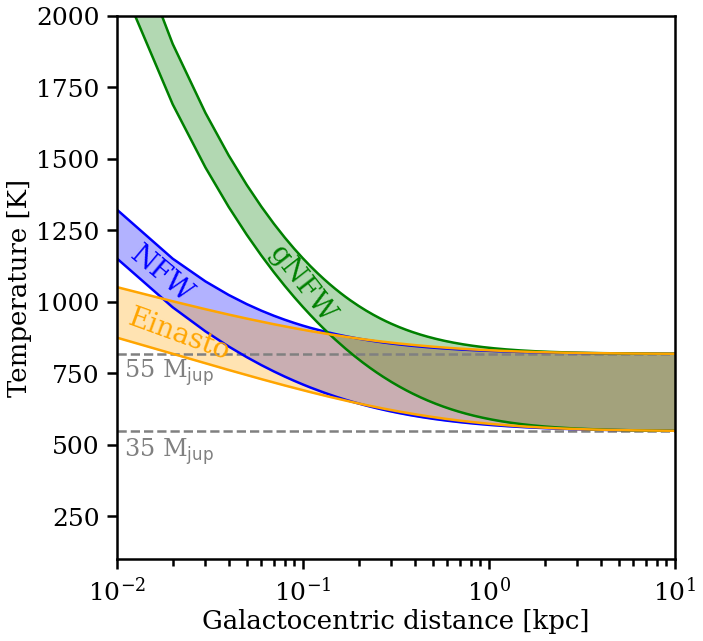

In [154]:
nBDs = 1000

f_true=1.; gamma_true=1.; rs_true=20.; rho0_true=0.42

relT = 0.; sigma = 0.;

fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True)

ax.axhline(548.17501586, ls="--", color="grey", lw=2.5)
ax.text(0.011, 460, r"35 M$_{\rm jup}$", color="grey", fontsize=24)
ax.axhline(817.96149933, ls="--", color="grey", lw=2.5)
ax.text(0.011, 735, r"55 M$_{\rm jup}$", color="grey", fontsize=24)

# NFW
robs1, Tobs1, mass1, ages1 = mock_population_all(nBDs, 35., f_true, gamma_true, 
                                                        rs_true, rho0_true=rho0_true, v=50.)
ax.plot(robs1, Tobs1, lw=2.5, color="blue")
robs2, Tobs2, mass2, ages2 = mock_population_all(nBDs, 55., f_true, gamma_true, 
                                                        rs_true, rho0_true=rho0_true, v=50.)
ax.plot(robs2, Tobs2, lw=2.5, color="blue")
ax.fill_between(robs1, Tobs1, Tobs2, color="blue", alpha=0.3)
ax.text(0.011, 1000, "NFW",color="blue",fontsize=28,rotation=320)


# gNFW
f_true=1.; gamma_true=1.4; rs_true=20.; rho0_true=0.42
robs1, Tobs1, mass1, ages1 = mock_population_all(nBDs, 35., f_true, gamma_true, 
                                                        rs_true, rho0_true=rho0_true, v=50.)
ax.plot(robs1, Tobs1, lw=2.5, color="green")
robs2, Tobs2, mass2, ages2 = mock_population_all(nBDs, 55., f_true, gamma_true, 
                                                        rs_true, rho0_true=rho0_true, v=50.)
ax.plot(robs2, Tobs2, lw=2.5, color="green")
ax.fill_between(robs1, Tobs1, Tobs2, color="green", alpha=0.3)
ax.text(0.062, 930, "gNFW",color="green",fontsize=28,rotation=308)


# Einasto
f_true=1.; gamma_true=0.2; rs_true=20.; rho0_true=0.42

robs1, Tobs1, mass1, ages1 = mock_population_all(nBDs, 35., f_true, gamma_true, 
                                                        rs_true, rho0_true=rho0_true, v=50., _rho="Einasto")
ax.plot(robs1, Tobs1, lw=2.5, color="orange")
robs2, Tobs2, mass2, ages2 = mock_population_all(nBDs, 55., f_true, gamma_true, 
                                                        rs_true, rho0_true=rho0_true, v=50., _rho="Einasto")
ax.plot(robs2, Tobs2, lw=2.5, color="orange")
ax.fill_between(robs1, Tobs1, Tobs2, color="orange", alpha=0.3)
ax.text(0.011, 800, "Einasto",color="orange",fontsize=28,rotation=340)

 
ax.set_ylim(100, 2000); ax.set_xscale("log")

ax.tick_params(which='major',direction="out",width=2.5,length=10,right=False,top=False,pad=7)
ax.tick_params(which='minor',direction="out",width=2.5,length=7,right=False,top=False,pad=7)


ax.set_ylabel("Temperature [K]", fontsize=26);
ax.set_xlabel("Galactocentric distance [kpc]", fontsize=26); ax.set_xlim(np.min(robs1), np.max(robs1))
fig.savefig("TvsR_rhoDMprofiles.pdf", bbox_inches="tight")

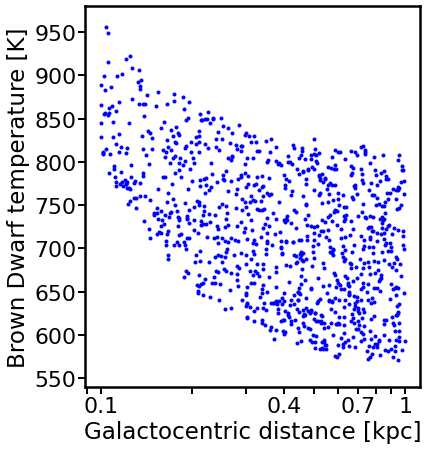

In [36]:
import mock_generation
imp.reload(mock_generation)
from mock_generation import mock_population_all_plot
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.5 #set the value globally

nBDs = 1000

f_true=1.; gamma_true=1.; rs_true=10.; rho0_true=0.42

relT = 0.
relM = 0.; relA=0.; relR=0.

fig, axes = plt.subplots(1, 1, figsize=(6, 7), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

plt.setp(axes.get_xticklabels(), fontsize=22)
plt.setp(axes.get_yticklabels(), fontsize=22)

robs, _, Tobs, sigmaTobs, mass, _, ages, _ = mock_population_all_plot(nBDs, relT, relM, relR, relA, f_true, gamma_true, 
                                                            rs_true, rho0_true=rho0_true)
axes.scatter(robs, Tobs, marker=".", color="blue")  
    
axes.set_ylabel("Brown Dwarf temperature [K]", fontsize=23);
axes.set_xlabel("Galactocentric distance [kpc]", fontsize=23);
axes.set_xscale("log")
axes.set_xticks([0.1, 0.4, 0.7, 1]); axes.set_xticklabels(("0.1", "0.4", "0.7", "1"))
#fig.savefig("TvsR_relT0.30_relX0.3.pdf", bbox_inches="tight")

axes.tick_params(which='major',direction="out",width=2.,length=7,right=False,top=False,pad=2)
axes.tick_params(which='minor',direction="out",width=2.,length=7,right=False,top=False, pad=2)
axes.set_ylim(540, 980)

fig.savefig("BDtemperature_poster1.pdf", bbox_inches="tight", transparent=True)

## Investigating the effect of borders

In [ ]:
def IMF_sampling(alpha, size, Mmin=14, Mmax=55):                                
    """                                                                         
    Sampling from power-law distribution                                        
    """                                                                         
    y = np.random.uniform(0, 1, size=size)                                      
    return ((Mmax**(alpha+1) - Mmin**(alpha+1))*y + Mmin**(alpha+1))**(1./(alpha+1))

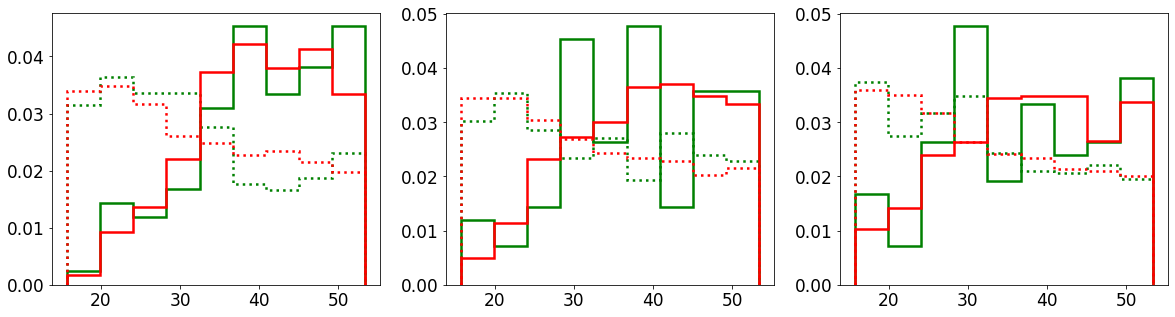

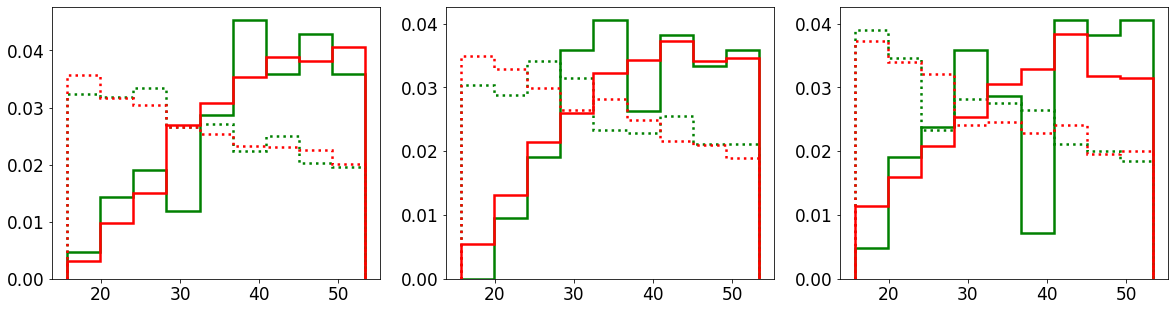

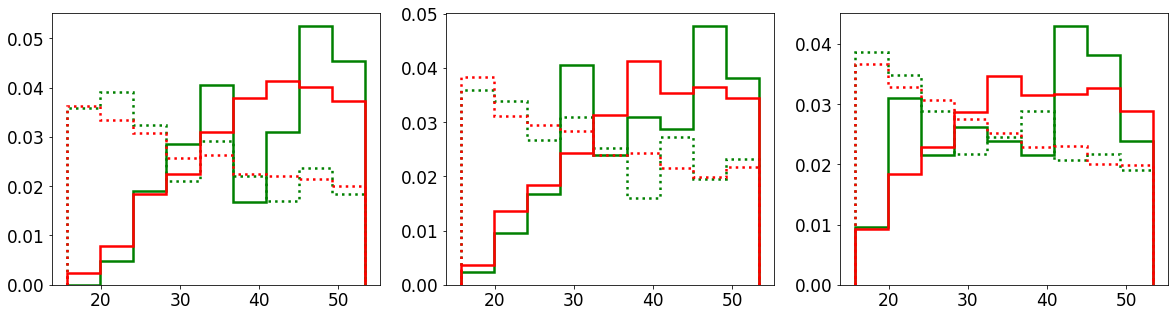

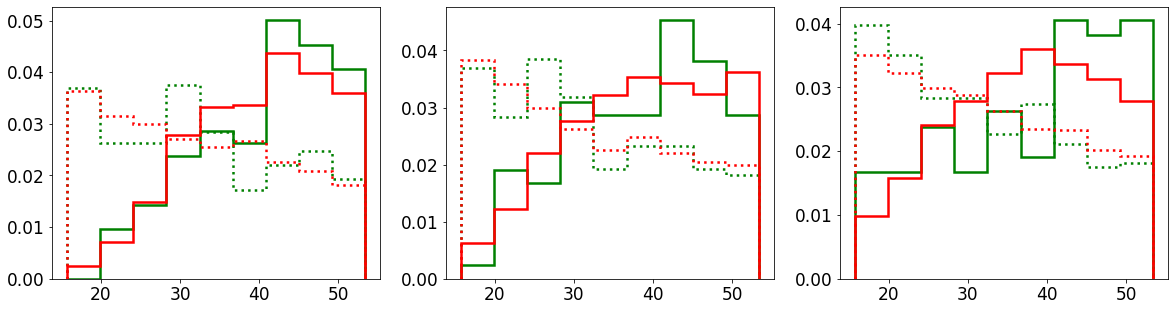

In [19]:
relTobs    = 0.1
f_true     = 1.
gamma_true = 1.2
rs_true    = 20.
rho0_true  = 0.42
Tcut       = 650.
v          = 100.
nBDs       = [100, 1000]
sigma      = [0.1, 0.2, 0.3]

M_min = 0.015*M_sun.value/M_jup.value
M_max = 0.051*M_sun.value/M_jup.value
bins  = np.linspace(M_min, M_max, 10)
color = ["green", "red"]

for k in range(4):
    np.random.seed(k)
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    j = -1
    for n in nBDs:
        j+=1
        i=0
        for s in sigma:
            (robs, sigmarobs, Tobs, sigmaTobs, Mobs,                                           
             sigmaMobs, Aobs, sigmaAobs) = mock_population_all(n, relTobs, s, s, s, f_true, gamma_true,            
                                          rs_true, rho0_true=rho0_true, Tmin=Tcut, v=v)
            mass = IMF_sampling(-0.6, int(8.5*n), Mmin=6, Mmax=75)
            ax[i].hist(mass, bins=bins, histtype="step", lw=2.5, color=color[j], ls=":", density=True)
            ax[i].hist(Mobs*M_sun.value/M_jup.value, histtype="step", lw=2.5, color=color[j], density=True, 
                       bins=bins);
            i+=1

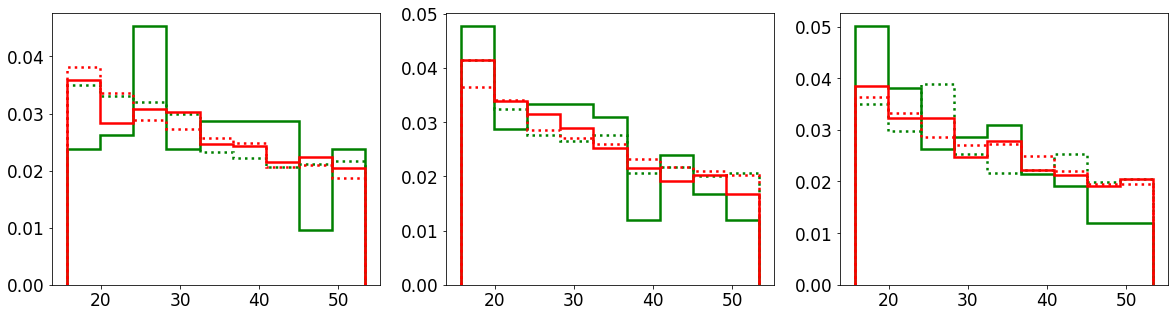

In [18]:
relTobs    = 0.1
f_true     = 1.
gamma_true = 1.2
rs_true    = 20.
rho0_true  = 0.42
Tcut       = 0.
v          = 100.
nBDs       = [100, 1000]
sigma      = [0.1, 0.2, 0.3]
np.random.seed(100) 

M_min = 0.015*M_sun.value/M_jup.value
M_max = 0.051*M_sun.value/M_jup.value
bins  = np.linspace(M_min, M_max, 10)

color = ["green", "red"]
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
j = -1
for n in nBDs:
    j+=1
    i=0
    for s in sigma:
        (robs, sigmarobs, Tobs, sigmaTobs, Mobs,                                           
         sigmaMobs, Aobs, sigmaAobs) = mock_population_all(n, relTobs, s, s, s, f_true, gamma_true,            
                                      rs_true, rho0_true=rho0_true, Tmin=Tcut, v=v)
        mass = IMF_sampling(-0.6, int(8.5*n), Mmin=6, Mmax=75)
        ax[i].hist(mass, bins=bins, histtype="step", lw=2.5, color=color[j], ls=":", density=True)
        ax[i].hist(Mobs*M_sun.value/M_jup.value, histtype="step", lw=2.5, color=color[j], density=True, 
                   bins=bins);
        i+=1

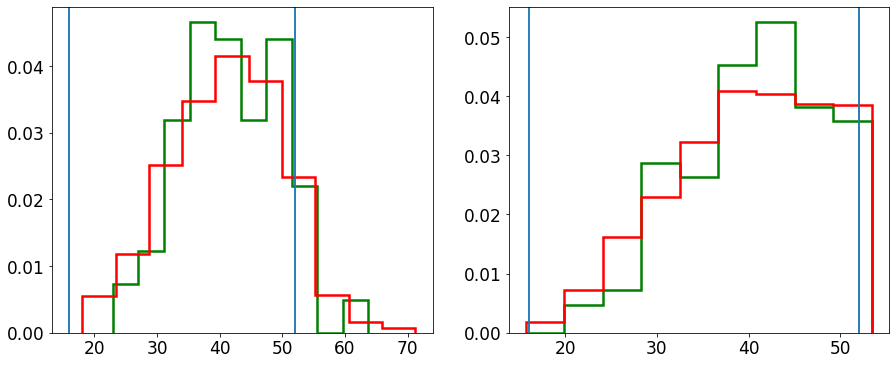

In [13]:
from mock_generation import mock_population_all_check

# Load theoretical cooling model                                                   
path = "/home/mariacst/exoplanets/running/data/"                                   
data = np.genfromtxt(path + "./ATMO_CEQ_vega_MIRI.txt", unpack=True)               
points = np.transpose(data[0:2, :])                                                
values = data[2]                                                                   
# Mock observation                                                                 
sigma = [0.1]
gamma_true = 0.9; rs_true=10.; f_true=1.; v=100; rho0_true=0.42; Tcut=650.
nBDs = [100, 1000]

M_min = 0.015*M_sun.value/M_jup.value
M_max = 0.051*M_sun.value/M_jup.value
bins  = np.linspace(M_min, M_max, 10)

color = ["green", "red"]
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
j = -1
for n in nBDs:
    j+=1
    i=0
    for s in sigma:
        (robs, robs_R, sigmarobs, Tobs, Tobs_R, sigmaTobs, Mobs, Mobs_R,                                         
         sigmaMobs, Aobs, Aobs_R, sigmaAobs) = mock_population_all_check(n, 0.1, s, s, s, f_true, gamma_true,            
                                                rs_true, rho0_true=rho0_true, Tmin=Tcut, v=v)
        ax[0].axvline(16); ax[0].axvline(52)
        ax[0].hist(Mobs_R*M_sun.value/M_jup.value, histtype="step", lw=2.5, color=color[j], ls="-", density=True)
        ax[1].axvline(16); ax[1].axvline(52)
        ax[1].hist(Mobs*M_sun.value/M_jup.value, histtype="step", lw=2.5, color=color[j], density=True, 
                   bins=bins);
        i+=1

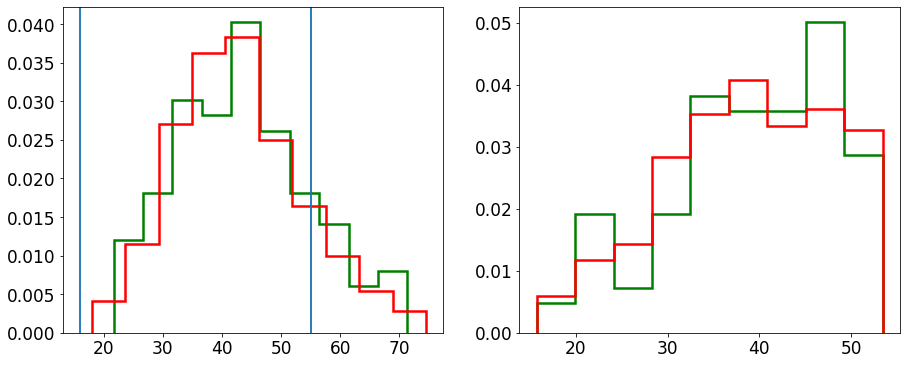

In [19]:
# Load theoretical cooling model                                                   
path = "/home/mariacst/exoplanets/running/data/"                                   
data = np.genfromtxt(path + "./ATMO_CEQ_vega_MIRI.txt", unpack=True)               
points = np.transpose(data[0:2, :])                                                
values = data[2]                                                                   
# Mock observation                                                                 
sigma = [0.2]
gamma_true = 0.9; rs_true=10.; f_true=1.; v=100; rho0_true=0.42; Tcut=650.
nBDs = [100, 1000]

M_min = 0.015*M_sun.value/M_jup.value
M_max = 0.051*M_sun.value/M_jup.value
bins  = np.linspace(M_min, M_max, 10)

color = ["green", "red"]
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
j = -1
for n in nBDs:
    j+=1
    i=0
    for s in sigma:
        (robs, robs_R, sigmarobs, Tobs, Tobs_R, sigmaTobs, Mobs, Mobs_R,                                         
         sigmaMobs, Aobs, Aobs_R, sigmaAobs) = mock_population_all_check(n, 0.1, s, s, s, f_true, gamma_true,            
                                                rs_true, rho0_true=rho0_true, Tmin=Tcut, v=v)
        ax[0].axvline(16); ax[0].axvline(55)
        ax[0].hist(Mobs_R*M_sun.value/M_jup.value, histtype="step", lw=2.5, color=color[j], ls="-", density=True)
        ax[1].hist(Mobs*M_sun.value/M_jup.value, histtype="step", lw=2.5, color=color[j], density=True, 
                   bins=bins);
        i+=1

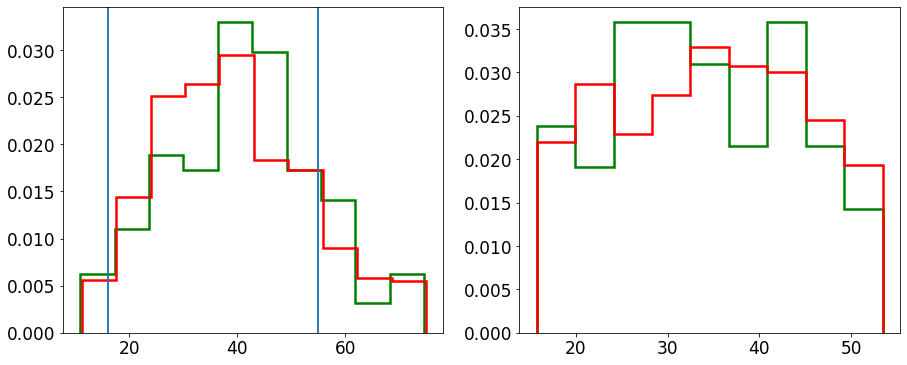

In [22]:
# Load theoretical cooling model                                                   
path = "/home/mariacst/exoplanets/running/data/"                                   
data = np.genfromtxt(path + "./ATMO_CEQ_vega_MIRI.txt", unpack=True)               
points = np.transpose(data[0:2, :])                                                
values = data[2]                                                                   
# Mock observation                                                                 
sigma = [0.3]
gamma_true = 1.5; rs_true=10.; f_true=1.; v=100; rho0_true=0.42; Tcut=650.
nBDs = [100, 1000]

M_min = 0.015*M_sun.value/M_jup.value
M_max = 0.051*M_sun.value/M_jup.value
bins  = np.linspace(M_min, M_max, 10)

color = ["green", "red"]
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
j = -1
for n in nBDs:
    j+=1
    i=0
    for s in sigma:
        (robs, robs_R, sigmarobs, Tobs, Tobs_R, sigmaTobs, Mobs, Mobs_R,                                         
         sigmaMobs, Aobs, Aobs_R, sigmaAobs) = mock_population_all_check(n, 0.1, s, s, s, f_true, gamma_true,            
                                                rs_true, rho0_true=rho0_true, Tmin=Tcut, v=v)
        ax[0].axvline(16); ax[0].axvline(55)
        ax[0].hist(Mobs_R*M_sun.value/M_jup.value, histtype="step", lw=2.5, color=color[j], ls="-", density=True)
        ax[1].hist(Mobs*M_sun.value/M_jup.value, histtype="step", lw=2.5, color=color[j], density=True, 
                   bins=bins);
        i+=1